In [2]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split



In [4]:
wine = load_wine()
wine.data.shape
wine.target
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine.feature_names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
Xtrain.shape
Xtest.shape

(54, 13)

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.8703703703703703

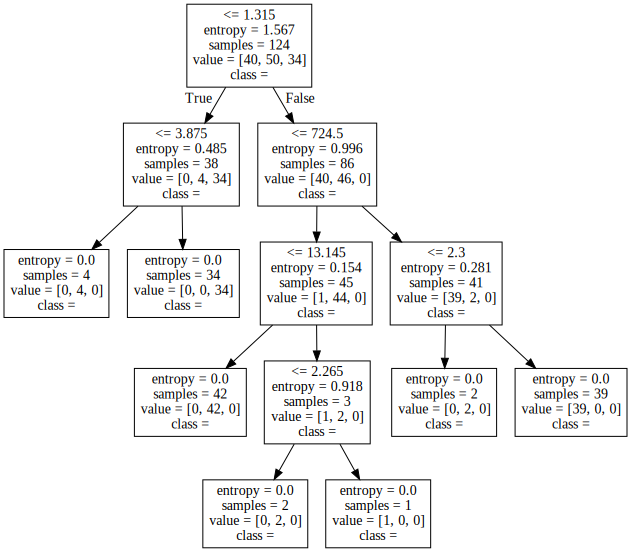

In [22]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸'] 
import graphviz
dot_data = tree.export_graphviz(clf
                               ,out_file = None
                               ,feature_names = feature_name             #显示上面定义的名称，去掉会只显示数据集与对应下标位置，不显示名称
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
#                                ,filled = True         #颜色渲染 越浅的颜色代表相关度越低
#                                ,rounded = True        #直角变圆角
                               )
graph = graphviz.Source(dot_data)
graph

In [23]:
clf.feature_importances_  #各个特征的对应比重
# [*zip(feature_name,clf.feature_importances_)]

array([0.02143083, 0.        , 0.01418023, 0.        , 0.        ,
       0.        , 0.52327597, 0.        , 0.        , 0.09495483,
       0.        , 0.        , 0.34615814])

In [24]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)#随机选取一部分特征，选取最优的指标，从这些树中选一颗最好的
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9259259259259259

In [25]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state = 30
                                 ,splitter="random"              #也是控制决策树的随机选项，random表示随机选取分枝，best表示随机时优先选择更重要的特征进行分枝  用于防止过拟合
                                 )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.8888888888888888

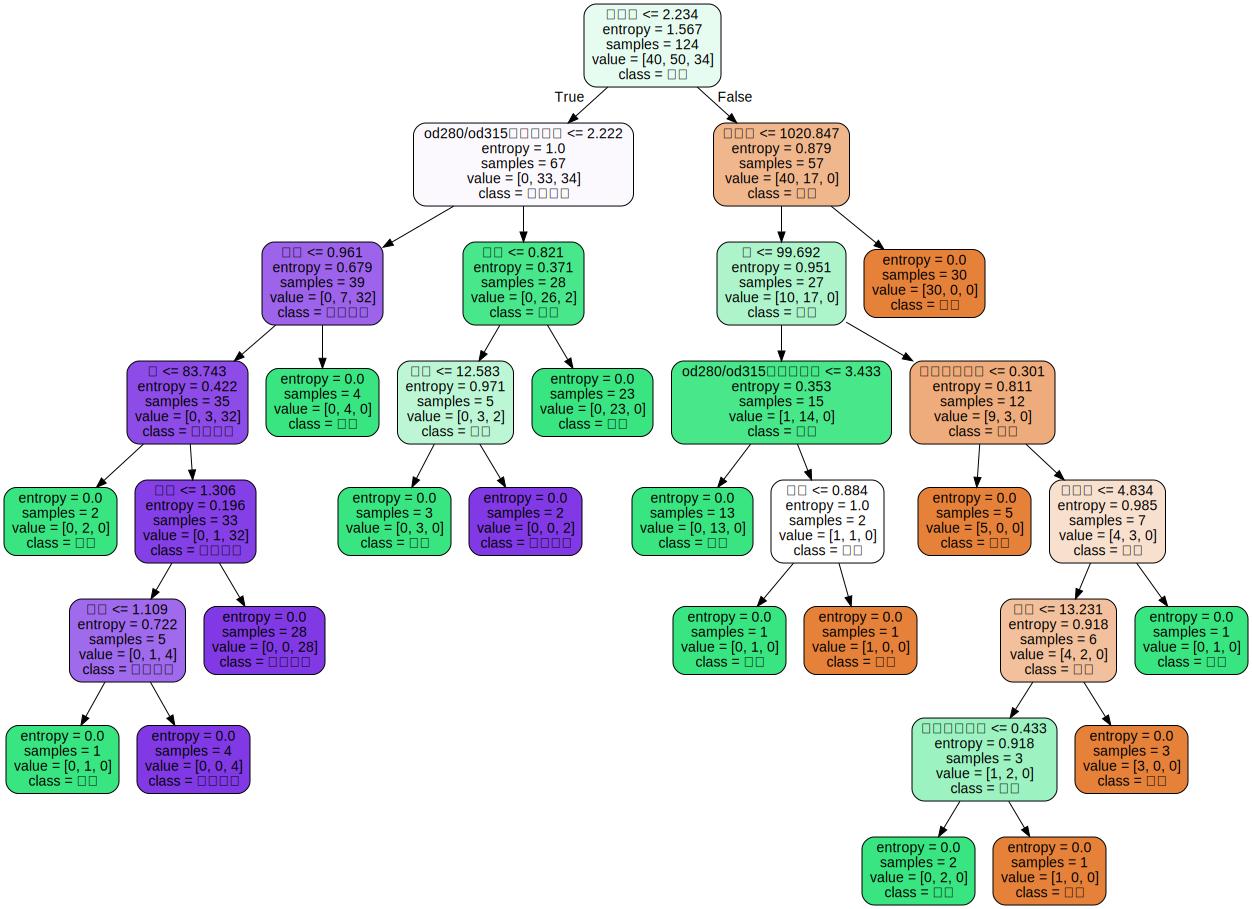

In [27]:
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names = feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [28]:
score_train = clf.score(Xtrain,Ytrain)#查看树对训练集的拟合程度
score_train

1.0

In [32]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state = 30
                                 ,splitter = "random"
                                 ,max_depth=3                           #设置树的最大深度，超过最大深度的全部删除
                                 ,min_samples_leaf=10                   #节点分支子节点的最小训练样本，如果某个子节点样本小于此数字，则此节点分枝不会发生
                                 ,min_samples_split=10                  #同上
                                 )
clf = clf.fit(Xtrain,Ytrain)

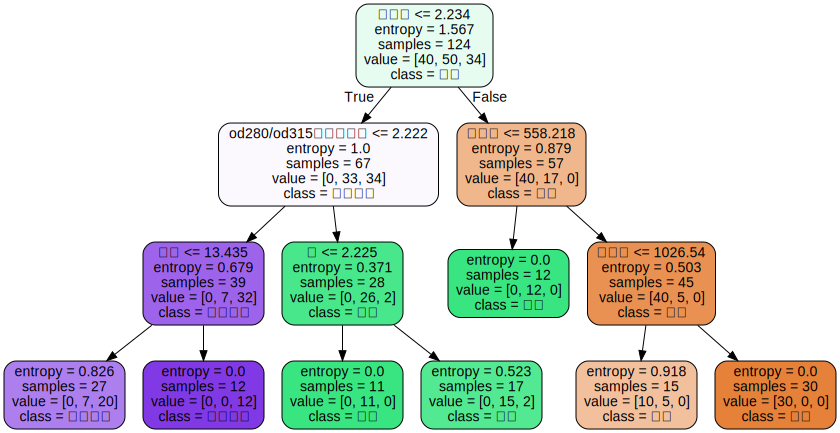

In [35]:
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names = feature_name
                               ,class_names=["琴酒","雪莉","贝尔摩德"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [36]:
clf.score(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.8888888888888888

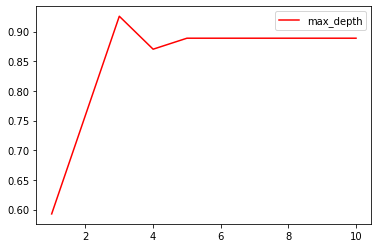

In [37]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,11),test,color = "red",label = "max_depth")
plt.legend()
plt.show()

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10,scoring="neg_mean_squared_error")

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

In [39]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80,1),axis = 0)
y = np.sin(x).ravel()
y[::5] +=3 * (0.5 - rng.rand(16))


np.random.random((2,1))
np.random.random((2,1)).ravel()
np.random.random((2,1)).ravel().shape

(2,)

In [40]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x,y)
regr_2.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

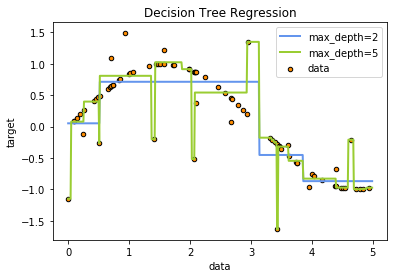

In [44]:
x_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
l = np.array([1,2,3,4])
l
l.shape
l[:,np.newaxis]
l[:,np.newaxis].shape
l[np.newaxis,:].shape


plt.figure()
plt.scatter(x,y,s=20,edgecolor="black",c="darkorange",label = "data")
plt.plot(x_test,y_1,color = "cornflowerblue",label = "max_depth=2",linewidth=2)
plt.plot(x_test,y_2,color = "yellowgreen",label="max_depth=5",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

data = pd.read_csv(r"D:\meachinelearn\菜菜sklearn\01 决策树课件数据源码\data.csv",index_col = 0)
data.head()
data.info()

data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

data["Sex"] = (data["Sex"] =="male").astype("int")
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [48]:
x = data.iloc[:,data.columns !="Survived"]
y = data.iloc[:,data.columns == "Survived"]

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])
Xtrain.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,16.0,0,0,86.50,0
1,3,1,65.0,0,0,7.75,2
2,2,0,33.0,0,2,26.00,0
3,1,1,45.0,0,0,26.55,0
4,2,0,34.0,1,1,32.50,0


In [49]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score_ = clf.score(Xtest,Ytest)
score_
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7739274770173645

0.8177860061287026


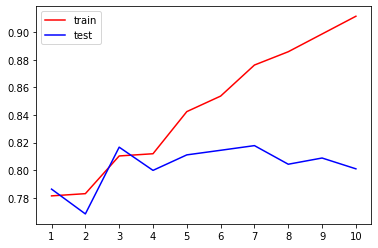

In [52]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state = 25
                                ,max_depth = i+1
                                ,criterion = "entropy"
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color = "red" ,label = "train")
plt.plot(range(1,11),te,color = "blue",label = "test")
plt.xticks(range(1,11))
plt.legend()
plt.show()


In [53]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
             ,'criterion':("gini","entropy")
             ,"max_depth":[*range(1,10)]
             ,'min_samples_leaf':[*range(1,50,5)]
             ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]          
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

GS.best_score_

0.8230158730158731